In [17]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn import cross_validation, preprocessing
matplotlib.style.use('ggplot')

In [2]:
df = pd.read_csv("../../assets/datasets/mtcars.csv")

In [3]:
df.head(2)

,Car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4


In [4]:
car = df['Car']

Create a column with numeric values for the cars

In [13]:
df['car_numeric'] = range(len(df['Car']))

In [14]:
df.head(2)

,Car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,car_numeric
0,Mazda RX4,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4,0
1,Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4,1


Plot the Data (Can Plot for Various Combinations of Variables)

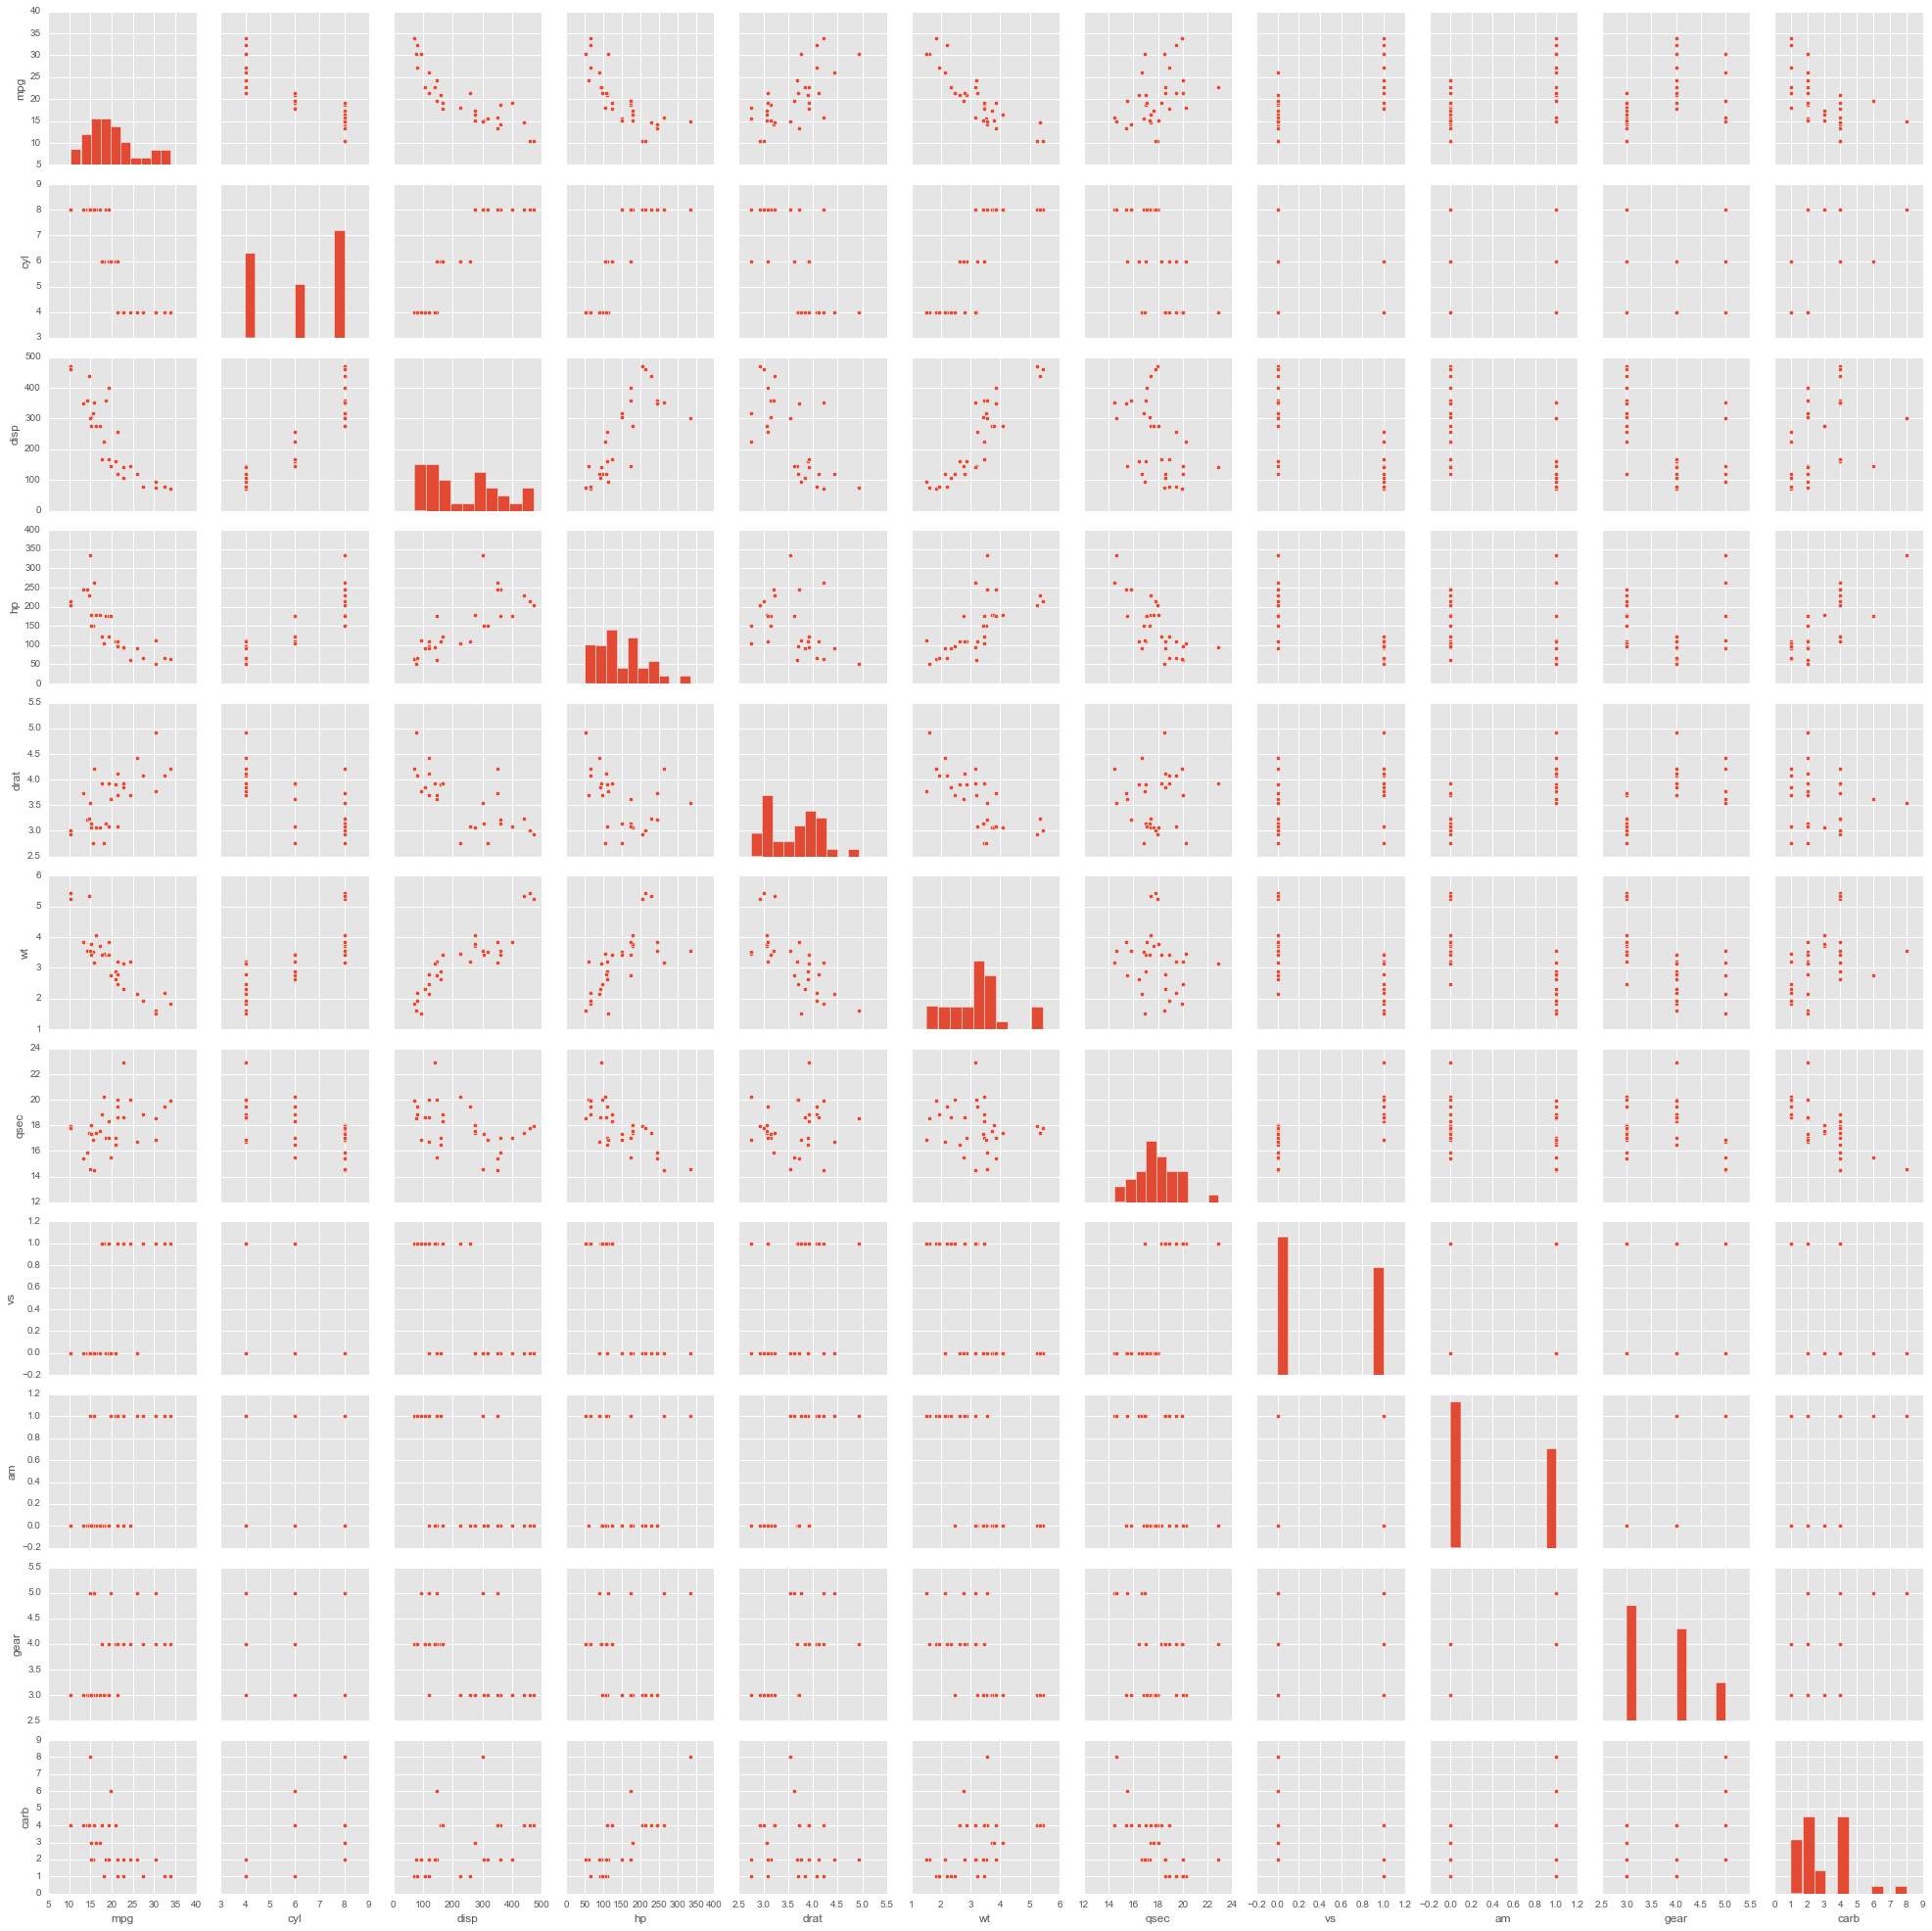

In [15]:
cols = df.columns[:-1]
sns.pairplot(df[cols])

Convert to Matrix and normalize your features

In [22]:
X = df[['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb', 'car_numeric']]
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = ['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb', 'car_numeric']
X_scaled.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,car_numeric
0,0.153299,-0.106668,-0.579750,-0.543655,0.576594,-0.620167,-0.789601,-0.881917,1.208941,0.430331,0.746967,-1.678744
1,0.153299,-0.106668,-0.579750,-0.543655,0.576594,-0.355382,-0.471202,-0.881917,1.208941,0.430331,0.746967,-1.570438
2,0.456737,-1.244457,-1.006026,-0.795570,0.481584,-0.931678,0.432823,1.133893,1.208941,0.430331,-1.140108,-1.462132
3,0.220730,-0.106668,0.223615,-0.543655,-0.981576,-0.002336,0.904736,1.133893,-0.827170,-0.946729,-1.140108,-1.353826
4,-0.234427,1.031121,1.059772,0.419550,-0.848562,0.231297,-0.471202,-0.881917,-0.827170,-0.946729,-0.511083,-1.245520


In [23]:
pd.DataFrame(X_scaled, columns = X.columns).describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,car_numeric
count,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,32.000000
mean,-5.481726e-16,4.163336e-17,1.387779e-16,-1.734723e-17,-3.122502e-16,4.683753e-17,-1.469311e-15,-6.938894e-18,5.551115e-17,-1.144917e-16,-6.938894e-18,0.000000
std,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001
min,-1.633610e+00,-1.244457e+00,-1.308518e+00,-1.403130e+00,-1.589643e+00,-1.769642e+00,-1.903996e+00,-8.819171e-01,-8.271702e-01,-9.467293e-01,-1.140108e+00,-1.678744
25%,-7.865141e-01,-1.244457e+00,-9.008917e-01,-7.437050e-01,-9.815764e-01,-6.604034e-01,-5.436944e-01,-8.819171e-01,-8.271702e-01,-9.467293e-01,-5.110827e-01,-0.839372
50%,-1.501383e-01,-1.066677e-01,-2.821771e-01,-3.510140e-01,1.870518e-01,1.118844e-01,-7.888899e-02,-8.819171e-01,-8.271702e-01,4.303315e-01,-5.110827e-01,0.000000
75%,4.567366e-01,1.031121e+00,7.810529e-01,4.936423e-01,6.145986e-01,4.078199e-01,5.977084e-01,1.133893e+00,1.208941e+00,4.303315e-01,7.469671e-01,0.839372
max,2.327934e+00,1.031121e+00,1.977904e+00,2.790515e+00,2.533809e+00,2.291423e+00,2.871986e+00,1.133893e+00,1.208941e+00,1.807392e+00,3.263067e+00,1.678744


Cluster - Choose K based on your plots and variables chosen

In [24]:
k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [25]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

Find the Silhoutte Score and plot

In [26]:
metrics.silhouette_score(X_scaled, labels, metric='euclidean')

0.40574915004161388

Finally, reassign your labels to the dataframe, and plot variables against each other according to color. Try this in both seaborn and matplotlib. 

What do you notice about your clusters?

In [ ]:
df['labels'] = labels

In [ ]:
sns.pairplot(df, hue='labels', vars=X_scaled.columns)